Baseline Decision Tree Accuracy: 0.4247

Classification Report:
              precision    recall  f1-score   support

           1       0.04      0.65      0.08      9362
           2       0.96      0.38      0.54    873568
           3       0.30      0.60      0.40    188164
           4       0.07      0.57      0.12     27219

    accuracy                           0.42   1098313
   macro avg       0.34      0.55      0.29   1098313
weighted avg       0.81      0.42      0.50   1098313



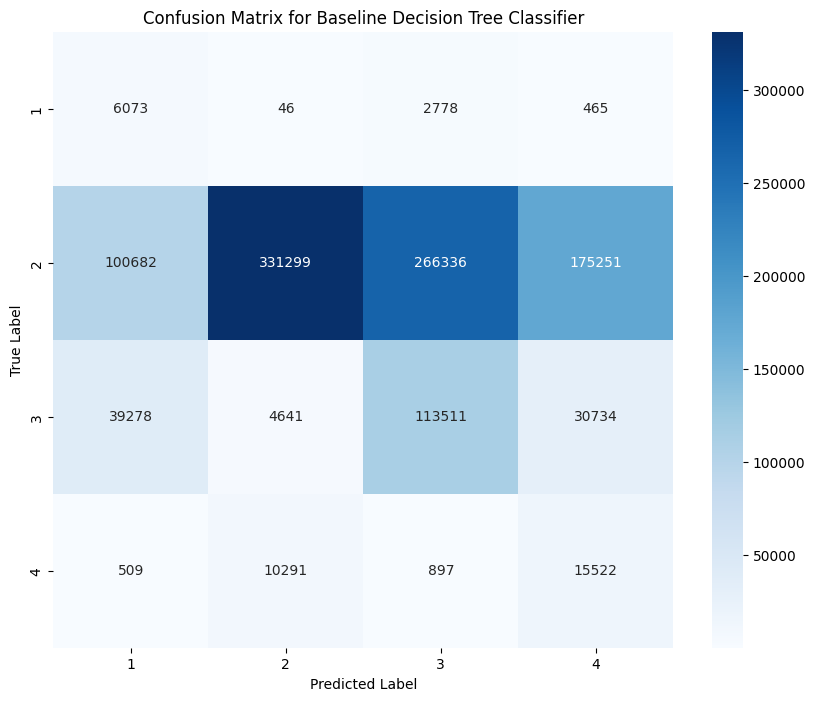

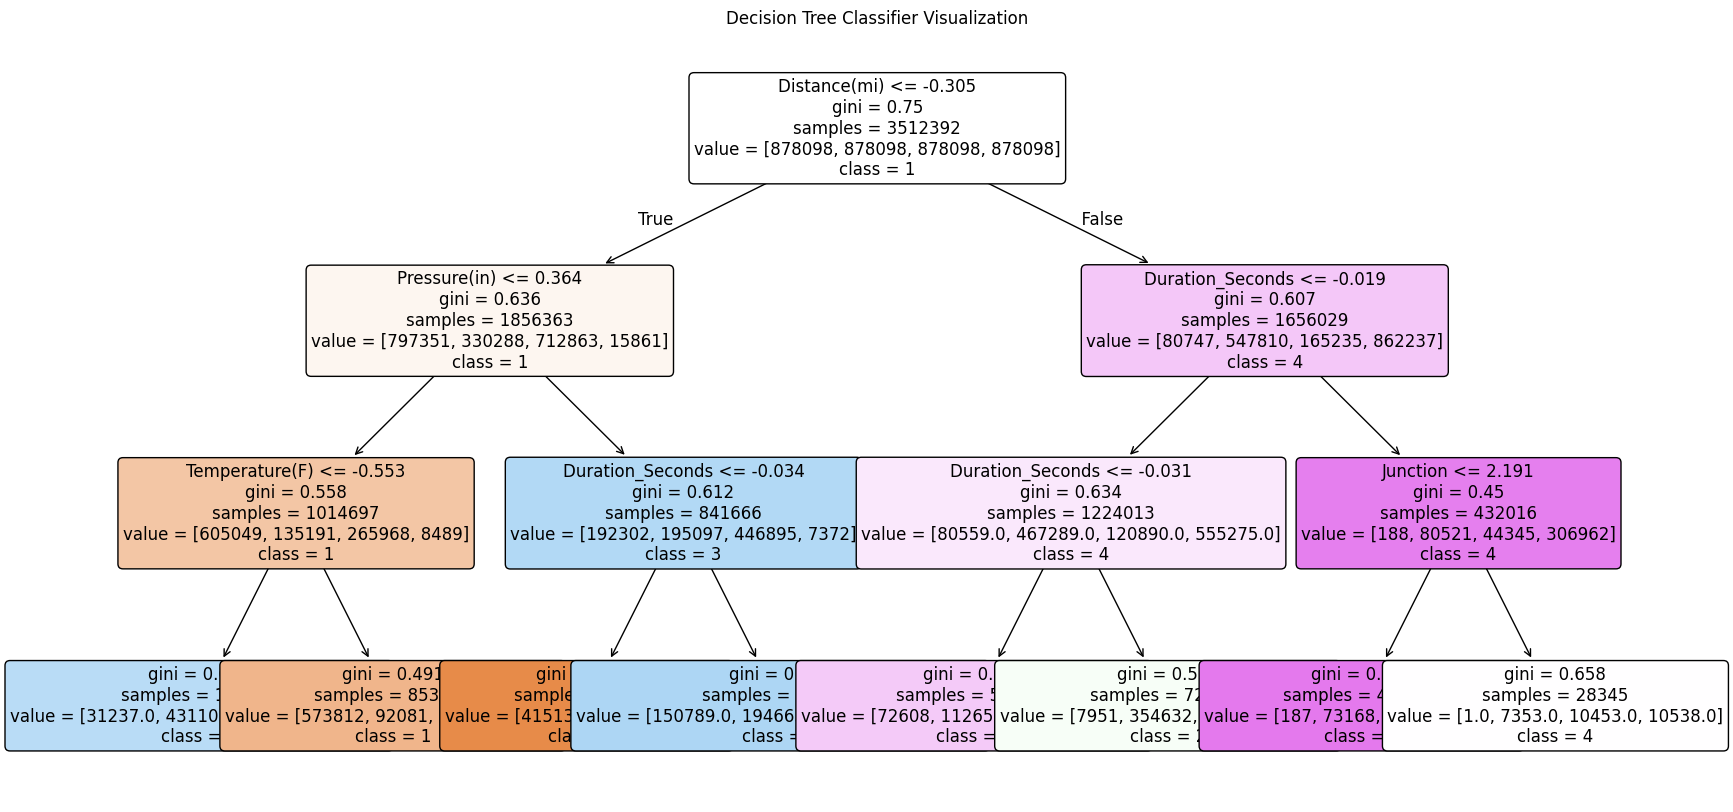

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

train_data = pd.read_csv("Train_Set.csv")
val_data = pd.read_csv("Validation_Set.csv")
test_data = pd.read_csv('Test_Set.csv')

X_train = train_data.drop(columns=["Severity"])
y_train = train_data["Severity"]

X_test = test_data.drop(columns=["Severity"])
y_test = test_data["Severity"]

# Decision Tree with Default Parameters
base_dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)

# Fit the model
base_dt_model.fit(X_train, y_train)

y_pred = base_dt_model.predict(X_test)

classes = sorted(y_test.unique())

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Decision Tree Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Baseline Decision Tree Classifier')
plt.show()

classes = [str(c) for c in sorted(y_test.unique())]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(base_dt_model, 
          feature_names=X_train.columns, 
          class_names=classes,           
          filled=True,                   
          rounded=True,                  
          fontsize=12)
plt.title('Decision Tree Classifier Visualization')
plt.show()
